# Naive Bayes Algorithm Case Study : Titanic Survival Prediction

As we already did the Decision tree and random forest case study on Titanic survival prediction, we will now focus on applying Naive bayes algorith on one Dependent variable vs remaining variables. Using a function, we minimize the code and evaluate the confusion matrix. The exploratory data analysis part will be skipped as this is already been covered in Decision tree and Random forest case study which can be referred through below github link

https://github.com/alone-survivour/LetsUpgrade-AI-ML/tree/master/Day%2024/TitanicAnalysis_DTRF

As a part of this project the naive bayes algorithm will be implemented through below categories for better understanding

1. An Introductory background to Titanic incident
2. An Introduction to Naive Bayes algorithm 
3. Collecting and loading the data
4. Building the model and drawing inferences
5. Conclusions

## 1. Introductory background to Titanic incident

As a part of this project, we have to evaluate the performace of each Naive bayes model that is going to be built on given features in dataset by taking one categorical data type as dependent and other features as independent variables.

In [1]:

from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

We all know very well about the titanic incident. The RMS Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean, four days into the ship's maiden voyage from Southampton to New York City. The largest ocean liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time) on Sunday, 14 April 1912.(source: https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic#:~:text=The%20RMS%20Titanic%20sank%20in%20the%20early%20morning,23%3A40%20%28ship%27s%20time%29%20on%20Sunday%2C%2014%20April%201912.)

## 2. Introduction to Naive Bayes theorm

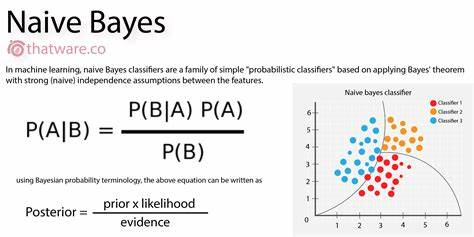

## 3. Collecting and Loading the data

The required datasets can be downloaded from below kaggle website repository
https://www.kaggle.com/c/titanic/data

We have train and test.csv files. As name suggests, train.csv file is used for modelling and training the model and test.csv file is used to predict if a passenger is survived or perished in that incident.

The both files consist of 12 columns and 891 observations. The columns description is given as below

1. PassengerID
2. Survived - 0 - NotSurvived, 1 - Survived
3. Pclass - 1 - Economical, 2 - Business, 3 - Business Premium
4. Name
5. Sex - Male, Female
6. Age
7. SibSp - Siblings
8. Parch - Parent Child
9. Ticket
10. Fare
11. Cabin - A,B,C,D,E,F,G,T
12. Embarked - S, Q, C

In [66]:
#Loading the required libraries

#Warnings package for ignoring unneccesary warnings
import warnings 
warnings.filterwarnings('ignore')

#Data storage and Manipulation libraries
import numpy as np
import pandas as pd

#Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


#Machine learning Naive bayes classifier libraries
from sklearn import tree
from sklearn import preprocessing
from sklearn.naive_bayes import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score

In [13]:
#Loading the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [18]:
#Check the train and test data shapes
print("train data shape:", train.shape)
print("test data shape:", test.shape)

train data shape: (889, 12)
test data shape: (417, 10)


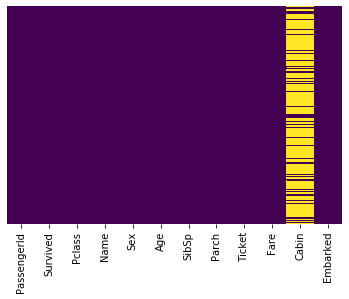

In [19]:
#Check the null values in train data through heatmap
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Looks like cabin feature in train.csv data has more nan values, instead of filling it, we can simply drop it from dataframe


In [45]:
#Creating a copy of dataset for safety side and performing operations on copied dataframe
data_train = train.copy()

In [46]:
data_train.drop('Cabin', axis=1, inplace=True)

In [47]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [48]:
#Dropping of name column as well as it is nothing to do with model performace
data_train.drop('Name', axis=1, inplace=True)

In [49]:
#Dropping of ticket column as well as it is nothing to do with model building
data_train.drop('Ticket', axis=1, inplace=True)

In [50]:
#Dropping of passengerid column as well as it is nothing to do with model building
data_train.drop('PassengerId', axis=1, inplace=True)

In [51]:
#creating a function that converts the age to categorical so that our model can understand it. This can be done using a function
def get_age(age):
      
    if (age<=12):
        return 0
    elif (12<age<=18):
        return 1
    elif (18<age<=30):
        return 2
    elif (30<age<=60):
        return 3
    elif (60<age):
        return 4

In [52]:
#converting the age numerical to categorical
Age = data_train['Age']
data_train['Age']= np.array([get_age(x) for x in Age])

In [53]:
#similarly creating a function that converts the fare numerical to categorical 
#so that our model can understand it. This can be done using a function
def get_fare(fare):
      
    if (fare<=8):
        return 0
    elif (8<fare<=14):
        return 1
    elif (14<fare<=31):
        return 2
    elif (31<fare):
        return 3

In [54]:
#converting the fare numerical to categorical
Fare = data_train['Fare']
data_train['Fare']= np.array([get_fare(x) for x in Fare])

In [55]:
#Converting the sex and embarked columns to categorical
data_train['Sex'] = data_train['Sex'].map({'male': 1, 'female': 0})
data_train['Embarked'] = data_train['Embarked'].map({'C':0,'Q':1,'S':2})

In [56]:
#lets have a final look at our dataset
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2,1,0,0,2
1,1,1,0,3,1,0,3,0
2,1,3,0,2,0,0,0,2
3,1,1,0,3,1,0,3,2
4,0,3,1,3,0,0,1,2


Good to go for building our model

## 4. Building the model

Here we need to create a model for each (One Dependent, Rest Independent) category and show the confusion matrix. But instead of taking each category individually, we will develop a function that automatically accepts the 

In [73]:
def some_name(k):
    features = list(data_train.columns.difference([k]))
    print("Dependent variable is:\n", k)
    print()
    print("Independent variables are:\n")
    print(features)
    print()
    X=data_train[features]
    y=data_train[k]
    print("Shape of X:\n", X.shape)
    print()
    print("Shape of y is:\n", y.shape)
    print()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    model_g = GaussianNB()
    model_preds = model_g.fit(X_train, y_train).predict(X_test)
    print("Here is the classification report:\n")
    print(classification_report(y_test, model_preds))
    print()
    print()
    cm = confusion_matrix(y_test, model_preds)
    class_label = ["Positive", "Negative"]
    df_cm = pd.DataFrame(cm)
    sns.heatmap(df_cm, annot = True, fmt = "d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Dependent variable is:
 Survived

Independent variables are:

['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']

Shape of X:
 (889, 7)

Shape of y is:
 (889,)

Here is the classification report:

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       107
           1       0.71      0.80      0.75        71

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.79       178
weighted avg       0.80      0.79      0.79       178





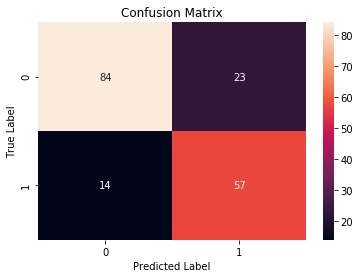

In [74]:
some_name('Survived')

### From the above heatmap, 84 have been classifed as truely positive while 57 have been classified as truly negative when Survived is taken as dependent and other features as independent variables

Dependent variable is:
 SibSp

Independent variables are:

['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'Survived']

Shape of X:
 (889, 7)

Shape of y is:
 (889,)

Here is the classification report:

              precision    recall  f1-score   support

           0       0.89      0.54      0.67       123
           1       0.52      0.25      0.34        44
           2       0.00      0.00      0.00         3
           3       0.01      0.50      0.03         2
           4       0.17      0.67      0.27         3
           5       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         2

    accuracy                           0.47       178
   macro avg       0.44      0.56      0.42       178
weighted avg       0.76      0.47      0.57       178





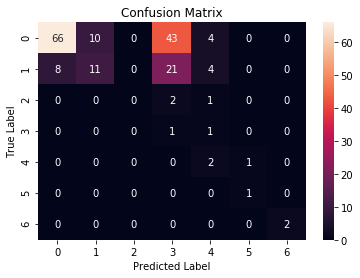

In [75]:
some_name('SibSp')

### From the above heatmap, we can conclude that total of 83 records were classified truely in case of SibSp as dependent and other features as independent variables is taken

Dependent variable is:
 Age

Independent variables are:

['Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Survived']

Shape of X:
 (889, 7)

Shape of y is:
 (889,)

Here is the classification report:

              precision    recall  f1-score   support

           0       0.57      0.50      0.53        16
           1       0.00      0.00      0.00         9
           2       0.55      0.21      0.31        52
           3       0.56      0.26      0.35        97
           4       0.02      0.50      0.04         4

    accuracy                           0.26       178
   macro avg       0.34      0.29      0.25       178
weighted avg       0.52      0.26      0.33       178





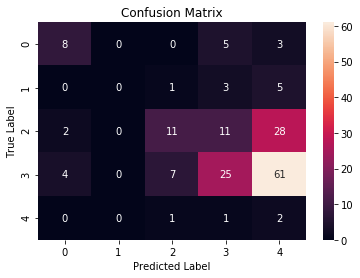

In [76]:
some_name('Age')

### From the above heatmap, we can conclude that a total of 46 records have been classified as  truely negative classified in case of Age as dependent and other features as independent variables is taken

Dependent variable is:
 Fare

Independent variables are:

['Age', 'Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Survived']

Shape of X:
 (889, 7)

Shape of y is:
 (889,)

Here is the classification report:

              precision    recall  f1-score   support

           0       0.64      0.89      0.74        44
           1       0.53      0.54      0.53        39
           2       0.60      0.57      0.59        42
           3       0.89      0.62      0.73        53

    accuracy                           0.66       178
   macro avg       0.66      0.65      0.65       178
weighted avg       0.68      0.66      0.66       178





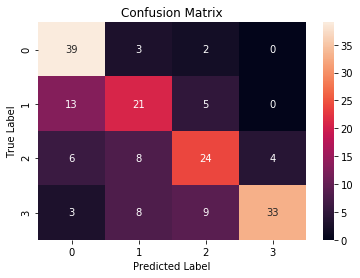

In [77]:
some_name('Fare')

### From the above heatmap, we can conclude that  117 record were classified truely(positive and negative) in case of Fare as dependent and other features as independent variables is taken

Dependent variable is:
 Embarked

Independent variables are:

['Age', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Survived']

Shape of X:
 (889, 7)

Shape of y is:
 (889,)

Here is the classification report:

              precision    recall  f1-score   support

           0       0.41      0.46      0.44        37
           1       0.25      0.57      0.35        14
           2       0.80      0.66      0.72       127

    accuracy                           0.61       178
   macro avg       0.49      0.56      0.50       178
weighted avg       0.68      0.61      0.63       178





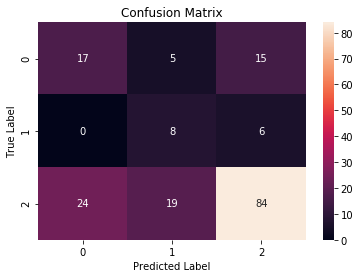

In [78]:
some_name('Embarked')

### From the above heatmap, we can conclude that 109 records were classified truely in case of Embarked as dependent and other features as independent variables is taken

Dependent variable is:
 Parch

Independent variables are:

['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Survived']

Shape of X:
 (889, 7)

Shape of y is:
 (889,)

Here is the classification report:

              precision    recall  f1-score   support

           0       0.81      0.38      0.52       132
           1       0.35      0.32      0.33        25
           2       0.57      0.20      0.30        20
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1

    accuracy                           0.35       178
   macro avg       0.29      0.15      0.19       178
weighted avg       0.71      0.35      0.46       178





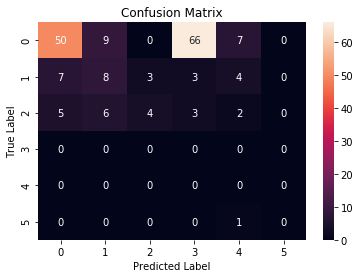

In [79]:
some_name('Parch')

### From the above heatmap, we can conclude that the 62 records were classified truely in case of Parch as dependent and other features as independent variables is taken

Dependent variable is:
 Sex

Independent variables are:

['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived']

Shape of X:
 (889, 7)

Shape of y is:
 (889,)

Here is the classification report:

              precision    recall  f1-score   support

           0       0.59      0.75      0.66        57
           1       0.87      0.75      0.81       121

    accuracy                           0.75       178
   macro avg       0.73      0.75      0.73       178
weighted avg       0.78      0.75      0.76       178





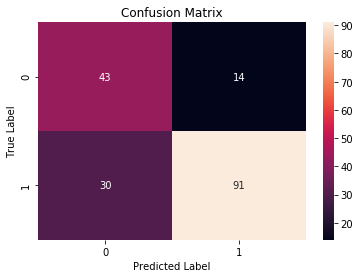

In [80]:
some_name('Sex')

### From the above heatmap, we can conclude that the 43 records are truly classified as positive and 91 are truely classified as negative  in case of Sex as dependent and other features as independent variables is taken

Dependent variable is:
 Pclass

Independent variables are:

['Age', 'Embarked', 'Fare', 'Parch', 'Sex', 'SibSp', 'Survived']

Shape of X:
 (889, 7)

Shape of y is:
 (889,)

Here is the classification report:

              precision    recall  f1-score   support

           1       0.70      0.85      0.77        47
           2       0.39      0.35      0.37        34
           3       0.82      0.76      0.79        97

    accuracy                           0.71       178
   macro avg       0.64      0.66      0.64       178
weighted avg       0.71      0.71      0.70       178





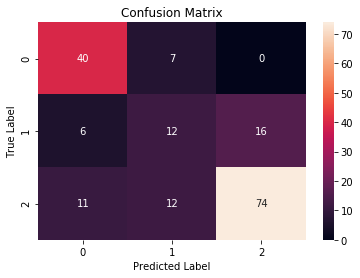

In [81]:
some_name('Pclass')

### From the above heatmap, we can conclude that 126 records were truely classified  in case of Pclass as dependent and other features as independent variables is taken